In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
file_months = {"April 2024.xlsx": "April",
               "May 2024.xlsx": "May",
               "June 2024.xlsx": "June",
               "July 2024.xlsx": "July",
               "August 2024.xlsx": "August",
               "September 2024.xlsx": "September",
               "October 2024.xlsx": "October",
               "December 2024.xlsx": "December",
               "January 2025.xlsx": "January",
               "February 2025.xlsx": "February",
               "March 2025.xlsx": "March"
    
}



In [10]:
all_data = []

for file, month in file_months.items():
    df = pd.read_excel(file, engine="openpyxl")
    df["Month"] = month
    all_data.append(df)



In [405]:
df = pd.concat(all_data, ignore_index = True)


In [407]:
print(df['Called number'].isna().sum())
print(df.describe())

0
            Duration  Route group  Site main number  Site timezone  \
count  660413.000000          0.0      6.604130e+05  660413.000000   
mean      199.876297          NaN      1.312507e+10    -317.160171   
std       845.536150          NaN      0.000000e+00      27.113464   
min         0.000000          NaN      1.312507e+10    -360.000000   
25%        19.000000          NaN      1.312507e+10    -360.000000   
50%        62.000000          NaN      1.312507e+10    -300.000000   
75%       183.000000          NaN      1.312507e+10    -300.000000   
max    142257.000000          NaN      1.312507e+10    -300.000000   

       Department ID  Authorization code   User number  Ring duration  \
count            0.0                 0.0  6.604130e+05  653949.000000   
mean             NaN                 NaN  1.235338e+10       4.996009   
std              NaN                 NaN  3.083874e+09       8.242251   
min              NaN                 NaN  1.180000e+03       0.000000   
25

### Question 1: Call volumes for each of the intake lines

In [220]:
intake_line_numbers = {
    "A2J Immigration": 13123478347,
    "A2J Immigration Toll Free": 18882652188,
    "Austin Intake VM": 13124235904,
    "Bankruptcy Helpdesk VM": 13122296344, 
    "CLASP VM": 13124235900,
    "Criminal Records": 13122296071,
    "Education Law Referrals VM": 13123478392,
    "Fair Housing Intake VM": 13124235909, 
    "HIV Intake VM": 13123478309,
    "JEHD": 13122296072,
    "legalclinics": 13124235938,
    "OP Appeals Project": 13124312101, 
    "Veterans Rights Project VM": 13123478340,
    "Trafficking Survivors Assistance Project": 13122296073,
    "Migrant Legal Assistance Program": 13124312299,
    "Nursing Home Ombudsman": 13122296079,
    "Markham Eviction Help Desk": 13122296014
}

In [222]:
# Business numbers Not needed for DF

df[(df["Called number"]==18882652188) & (df["Direction"]=="TERMINATING")]
df[(df["Called number"]==18004459025) & (df["Direction"]=="TERMINATING")]
df[(df["Called number"]==18884018200) & (df["Direction"]=="TERMINATING")]

,Start time,Answer time,Duration,Called number,Correlation ID,Location,Inbound trunk,Outbound trunk,Route group,Direction,...,Device owner UUID,Call Recording Platform Name,Call Recording Result,Call Recording Trigger,Redirecting party UUID,Public Calling IP Address,Public Called IP Address,Month,User,Intake Line Name


In [224]:
# Filtering for all Intake Calls
intake_calls = df[df['Called number'].isin(intake_line_numbers.values())]
intake_calls


# Filtering for Inbound intake calls
intake_calls_inbound = intake_calls[intake_calls['Direction'] == 'TERMINATING']
intake_calls_inbound

,Start time,Answer time,Duration,Called number,Correlation ID,Location,Inbound trunk,Outbound trunk,Route group,Direction,...,Device owner UUID,Call Recording Platform Name,Call Recording Result,Call Recording Trigger,Redirecting party UUID,Public Calling IP Address,Public Called IP Address,Month,User,Intake Line Name
17,2024-04-30T23:19:44.684Z,NaN,0,13122296071,d68220ed-64b7-429a-81e0-86aa59fc5a6d,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,Criminal Records
27,2024-04-30T23:09:20.102Z,2024-04-30T23:09:20.331Z,1984,13124312299,128f1137-4f98-4fd0-b763-b3678fa23d4d,HQ,NaN,wcc_Iyq3fhu9TjS8hbku8c4Zcg,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,Migrant Legal Assistance Program
32,2024-04-30T22:54:32.032Z,2024-04-30T22:54:50.067Z,52,13124235938,967f3b98-4f0e-42c7-9aee-e46b01f181b5,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,legalclinics
43,2024-04-30T22:41:18.070Z,2024-04-30T22:41:18.107Z,212,13122296014,9463a568-c2c6-4c11-a536-c87a0fe7a220,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,Markham Eviction Help Desk
44,2024-04-30T22:37:29.954Z,2024-04-30T22:37:30.183Z,153,13124312299,d4953d11-271c-4d77-a525-3987c87eeab9,HQ,NaN,wcc_Iyq3fhu9TjS8hbku8c4Zcg,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,Migrant Legal Assistance Program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660394,2025-03-01T00:39:46.794Z,2025-03-01T00:39:47.027Z,1736,13124312299,03723948-d820-4d4c-b505-244a01c416c5,HQ,NaN,wcc_Iyq3fhu9TjS8hbku8c4Zcg,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,NaN,Migrant Legal Assistance Program
660396,2025-03-01T00:16:52.263Z,2025-03-01T00:16:52.409Z,1771,13124312299,9f9343a6-51a5-4a6d-8d9b-c5eeee4a9b4c,HQ,NaN,wcc_Iyq3fhu9TjS8hbku8c4Zcg,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,NaN,Migrant Legal Assistance Program
660400,2025-03-01T00:07:20.299Z,2025-03-01T00:07:38.357Z,79,13122296079,d3f44869-720c-41a4-9613-195123ad5706,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,Ombudsman Intake,Nursing Home Ombudsman
660401,2025-03-01T00:07:11.758Z,2025-03-01T00:07:12.118Z,1782,13124312299,45979391-565d-413c-8dce-ecff59f8e99b,HQ,NaN,wcc_Iyq3fhu9TjS8hbku8c4Zcg,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,NaN,Migrant Legal Assistance Program


In [226]:
# Adding Formatted Date/time column for Readability
intake_calls_inbound['Start time'] = pd.to_datetime(intake_calls_inbound['Start time'])
intake_calls_inbound['Start time Hour/Min'] = intake_calls_inbound['Start time'].dt.strftime('%I:%M %p')
intake_calls_inbound.loc[:, ["Start time", "Start time Hour/Min"]]



/var/folders/dt/c0g1n3x53fj6tmsz1md9qz9c0000gn/T/ipykernel_1639/3370582567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intake_calls_inbound['Start time'] = pd.to_datetime(intake_calls_inbound['Start time'])
/var/folders/dt/c0g1n3x53fj6tmsz1md9qz9c0000gn/T/ipykernel_1639/3370582567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intake_calls_inbound['Start time Hour/Min'] = intake_calls_inbound['Start time'].dt.strftime('%I:%M %p')


,Start time,Start time Hour/Min
17,2024-04-30 23:19:44.684000+00:00,11:19 PM
27,2024-04-30 23:09:20.102000+00:00,11:09 PM
32,2024-04-30 22:54:32.032000+00:00,10:54 PM
43,2024-04-30 22:41:18.070000+00:00,10:41 PM
44,2024-04-30 22:37:29.954000+00:00,10:37 PM
...,...,...
660394,2025-03-01 00:39:46.794000+00:00,12:39 AM
660396,2025-03-01 00:16:52.263000+00:00,12:16 AM
660400,2025-03-01 00:07:20.299000+00:00,12:07 AM
660401,2025-03-01 00:07:11.758000+00:00,12:07 AM


In [228]:
# Adding Column Mapping Intake lines to Names
intake_calls_inbound['Intake Line Name'] = intake_calls_inbound['Called number'].apply(lambda x: next((key for key, value in intake_line_numbers.items() if x in (value if isinstance(value, list) else [value])), None))

intake_calls_inbound.loc[:, ["Called number", "Intake Line Name"]]

/var/folders/dt/c0g1n3x53fj6tmsz1md9qz9c0000gn/T/ipykernel_1639/1400956090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intake_calls_inbound['Intake Line Name'] = intake_calls_inbound['Called number'].apply(lambda x: next((key for key, value in intake_line_numbers.items() if x in (value if isinstance(value, list) else [value])), None))


,Called number,Intake Line Name
17,13122296071,Criminal Records
27,13124312299,Migrant Legal Assistance Program
32,13124235938,legalclinics
43,13122296014,Markham Eviction Help Desk
44,13124312299,Migrant Legal Assistance Program
...,...,...
660394,13124312299,Migrant Legal Assistance Program
660396,13124312299,Migrant Legal Assistance Program
660400,13122296079,Nursing Home Ombudsman
660401,13124312299,Migrant Legal Assistance Program


In [70]:
intake_calls_inbound[intake_calls_inbound['Correlation ID'].duplicated(keep=False)]

,Start time,Answer time,Duration,Called number,Correlation ID,Location,Inbound trunk,Outbound trunk,Route group,Direction,...,Call Recording Platform Name,Call Recording Result,Call Recording Trigger,Redirecting party UUID,Public Calling IP Address,Public Called IP Address,Month,User,Start time Hour/Min,Intake Line Name
27467,2024-04-18 17:16:31.184000+00:00,2024-04-18T17:16:34.110Z,1129,13122296014,9d86a76f-28dc-4876-a0b6-db56b9cb7b1e,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,05:16 PM,Markham Eviction Help Desk
28133,2024-04-18 15:37:35.682000+00:00,NaN,0,13122296014,9d86a76f-28dc-4876-a0b6-db56b9cb7b1e,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,03:37 PM,Markham Eviction Help Desk
46513,2024-04-10 17:40:05.036000+00:00,2024-04-10T17:40:07.822Z,16,13122296014,70c8bd89-a070-4291-8f8b-4d1e91e05a32,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,05:40 PM,Markham Eviction Help Desk
46642,2024-04-10 17:21:45.225000+00:00,NaN,0,13122296014,70c8bd89-a070-4291-8f8b-4d1e91e05a32,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,05:21 PM,Markham Eviction Help Desk
46715,2024-04-10 17:11:11.688000+00:00,2024-04-10T17:11:21.943Z,23,13122296014,70c8bd89-a070-4291-8f8b-4d1e91e05a32,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,April,NaN,05:11 PM,Markham Eviction Help Desk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601146,2025-01-29 14:09:24.807000+00:00,2025-01-29T14:09:42.898Z,69,13124235938,32ca898f-fe02-4d6d-97c2-f022ff89cd8a,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,February,NaN,02:09 PM,legalclinics
601150,2025-01-29 14:08:49.187000+00:00,2025-01-29T14:08:49.197Z,25,13122296072,bb4ccd6e-dd9a-4fb6-9e61-7a5a0883264a,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,February,NaN,02:08 PM,JEHD
601186,2025-01-29 14:01:14.709000+00:00,2025-01-29T14:01:32.776Z,93,13124235938,b327ed59-4029-4119-92d8-c17286f257c2,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,February,NaN,02:01 PM,legalclinics
601214,2025-01-29 13:31:47.146000+00:00,2025-01-29T13:32:05.184Z,155,13124235938,113bb587-d1af-49c7-9929-479647bf440d,HQ,NaN,NaN,NaN,TERMINATING,...,NaN,NaN,NaN,NaN,NaN,NaN,February,NaN,01:31 PM,legalclinics


#### - Call Volume by Intake Line

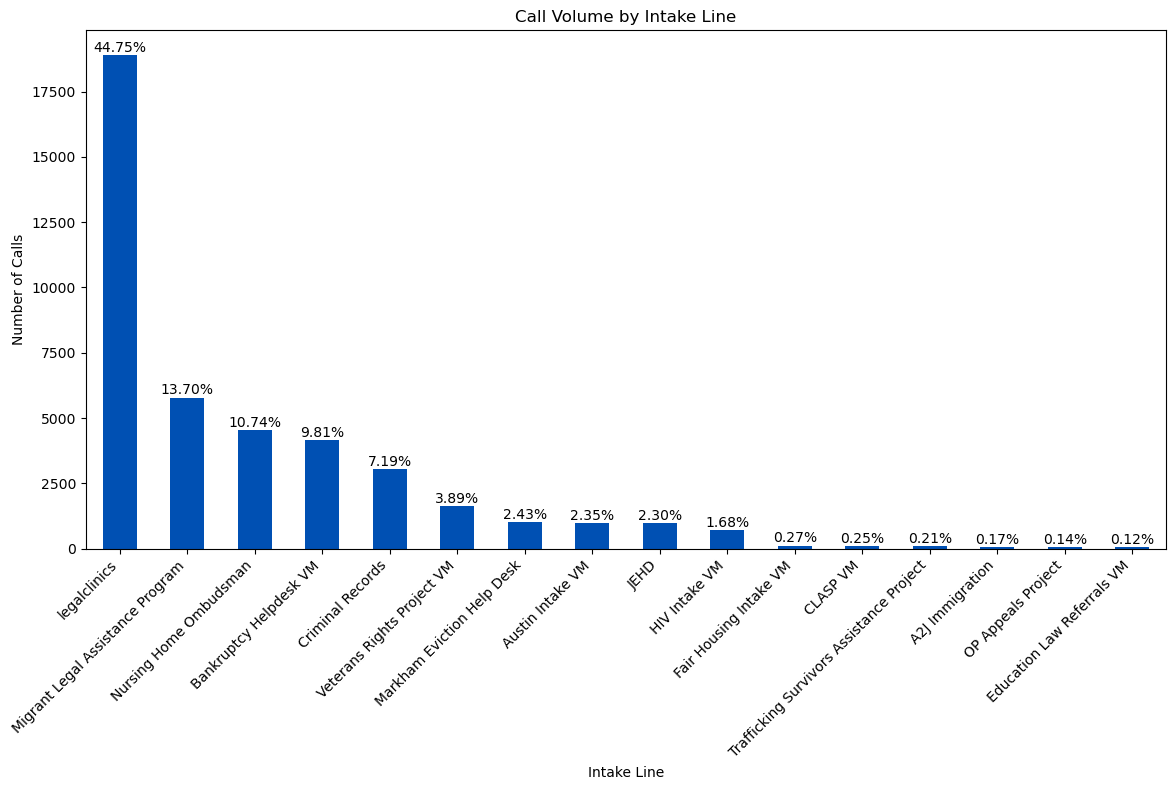

In [347]:
# Grouping by 'Intake Line Name' and calculating the call volume for each intake line
call_volume_by_intake_line = intake_calls_inbound.groupby('Intake Line Name').size()

# Sorting Largest to smallest
call_volume_by_intake_line = call_volume_by_intake_line.sort_values(ascending=False)

# Calculating the total call volume
total_calls = call_volume_by_intake_line.sum()

# Calculating the proportions for each intake line (relative to total calls)
proportions = call_volume_by_intake_line / total_calls * 100

# Plotting the call volume for each intake line with proportions at the top
plt.figure(figsize=(12, 8))  
ax = call_volume_by_intake_line.plot(kind='bar', color='#0050B3')

# proportions for the bars
for i, v in enumerate(call_volume_by_intake_line):
    ax.text(i, v + 2, f'{proportions[i]:.2f}%', ha='center', va='bottom', fontsize=10)

# For better readability
plt.xticks(rotation=45, ha='right')

plt.title('Call Volume by Intake Line')
plt.xlabel('Intake Line')
plt.ylabel('Number of Calls')
plt.tight_layout()  

plt.show()


#### - Call Volume by Intake Line by Month

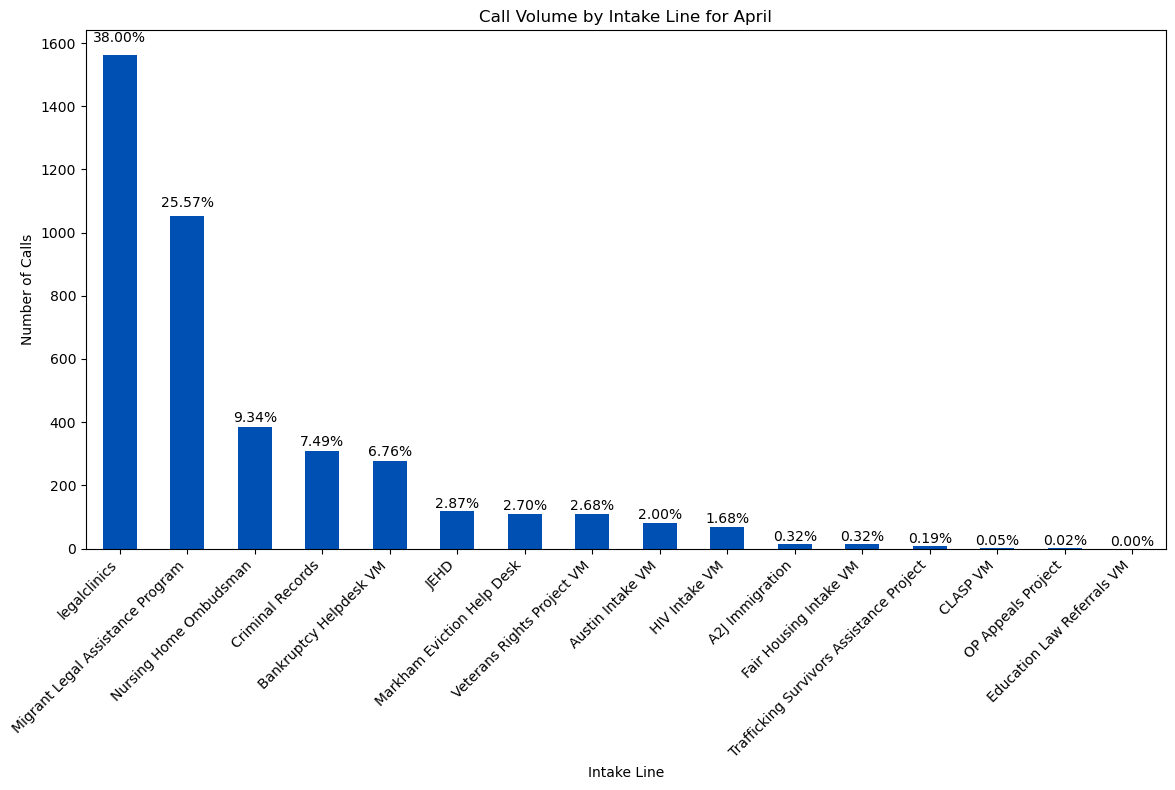

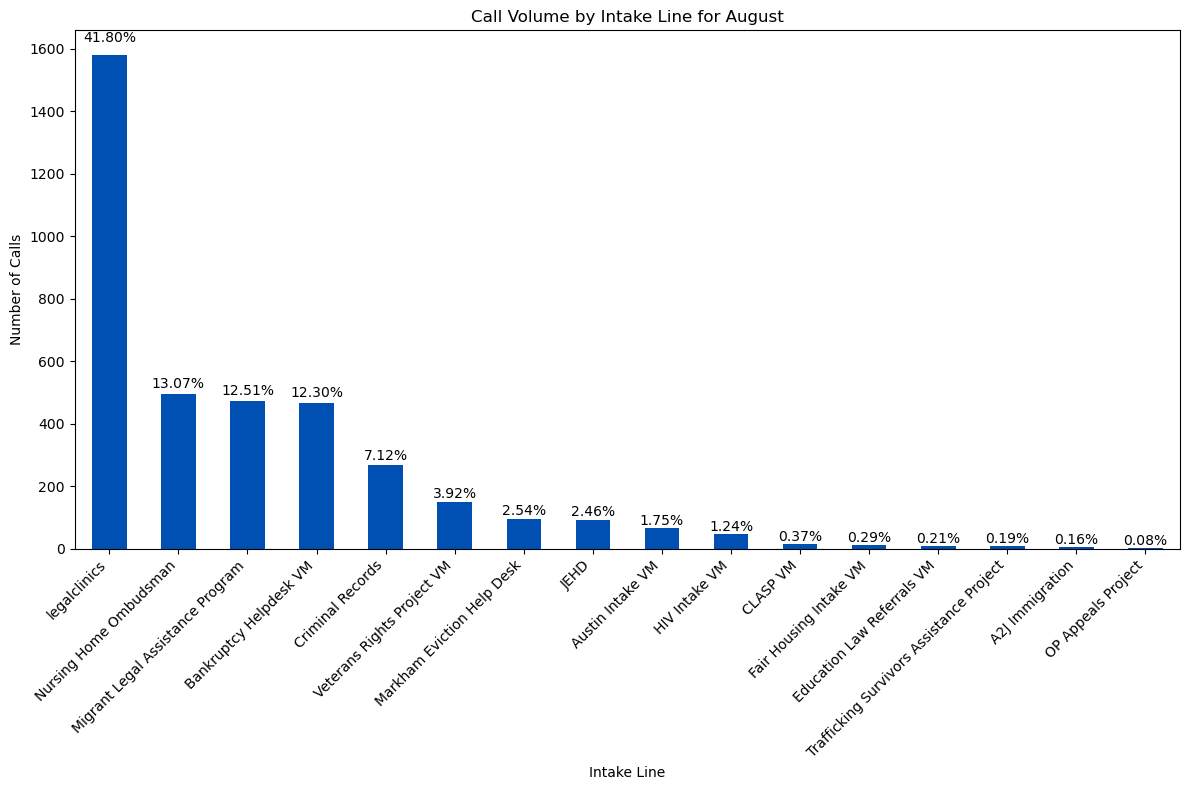

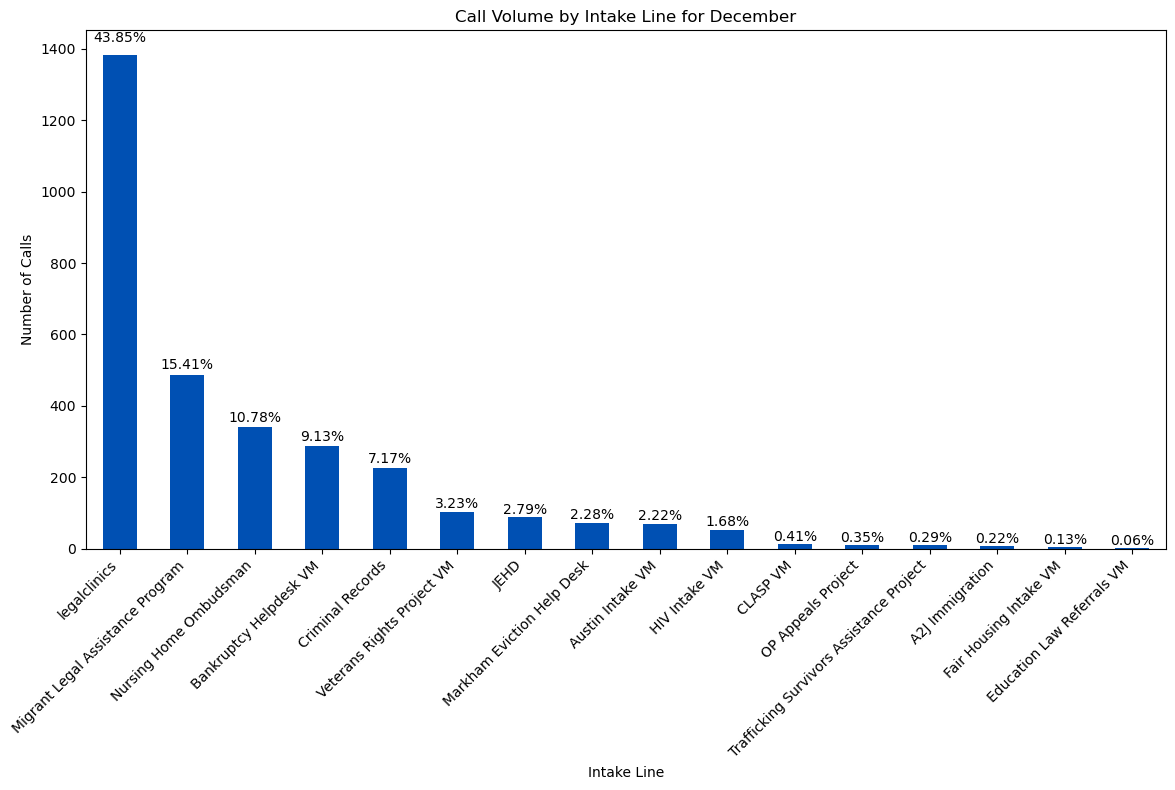

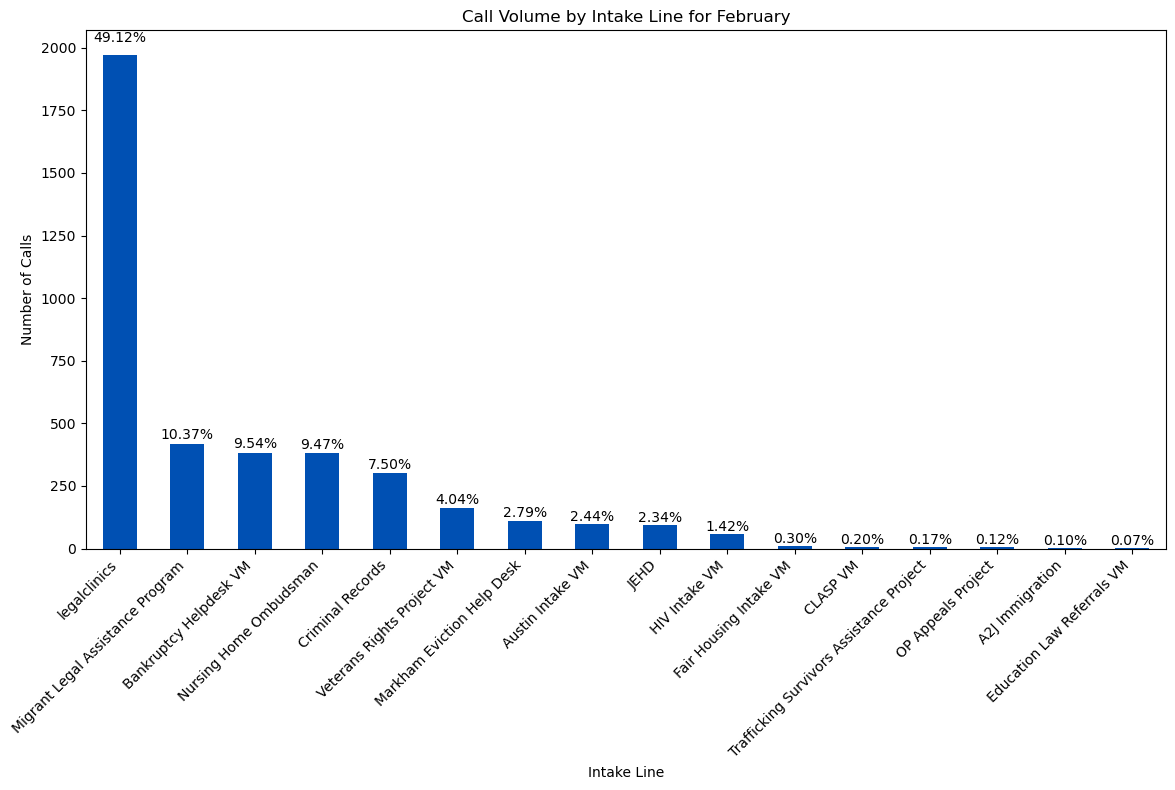

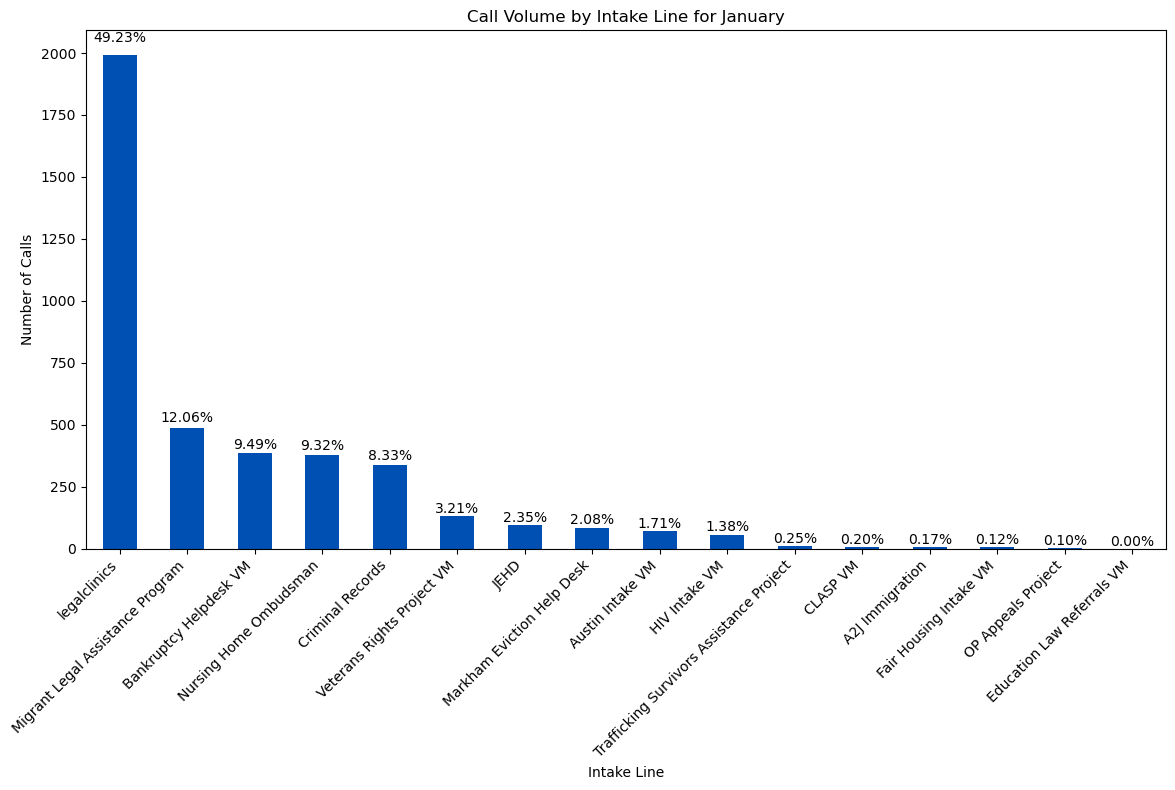

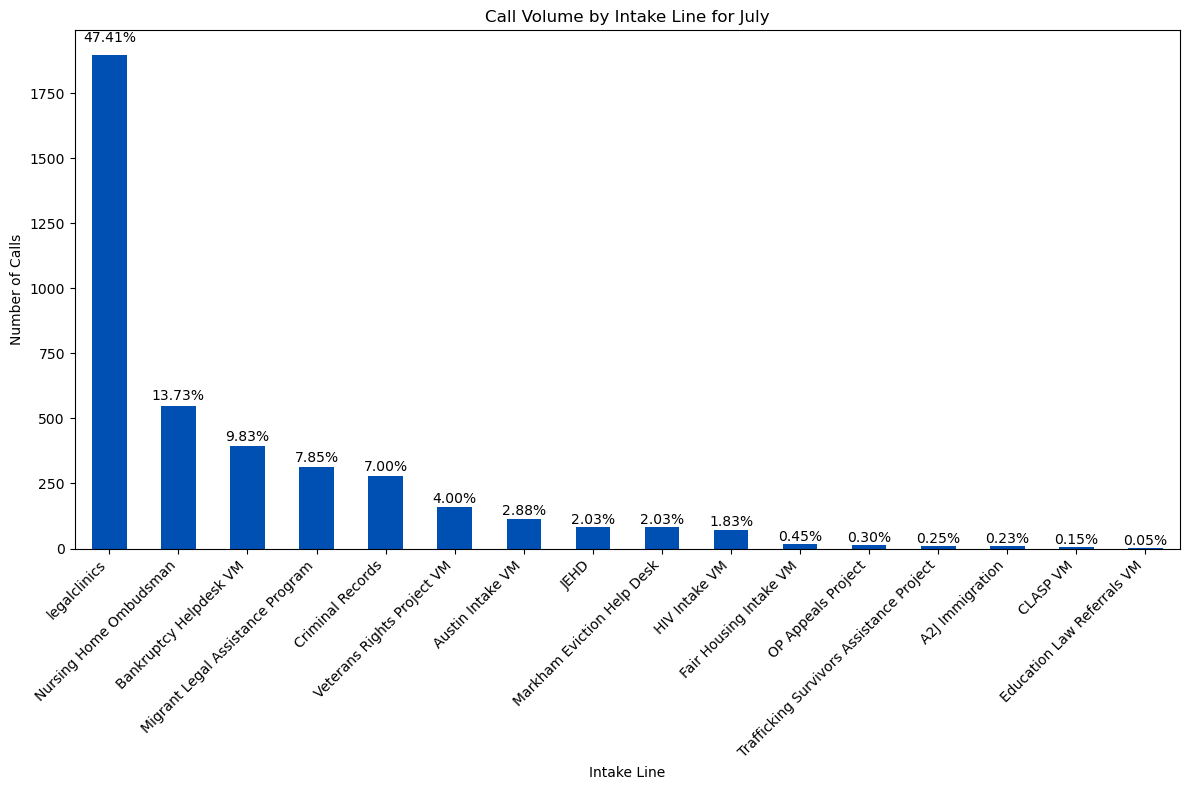

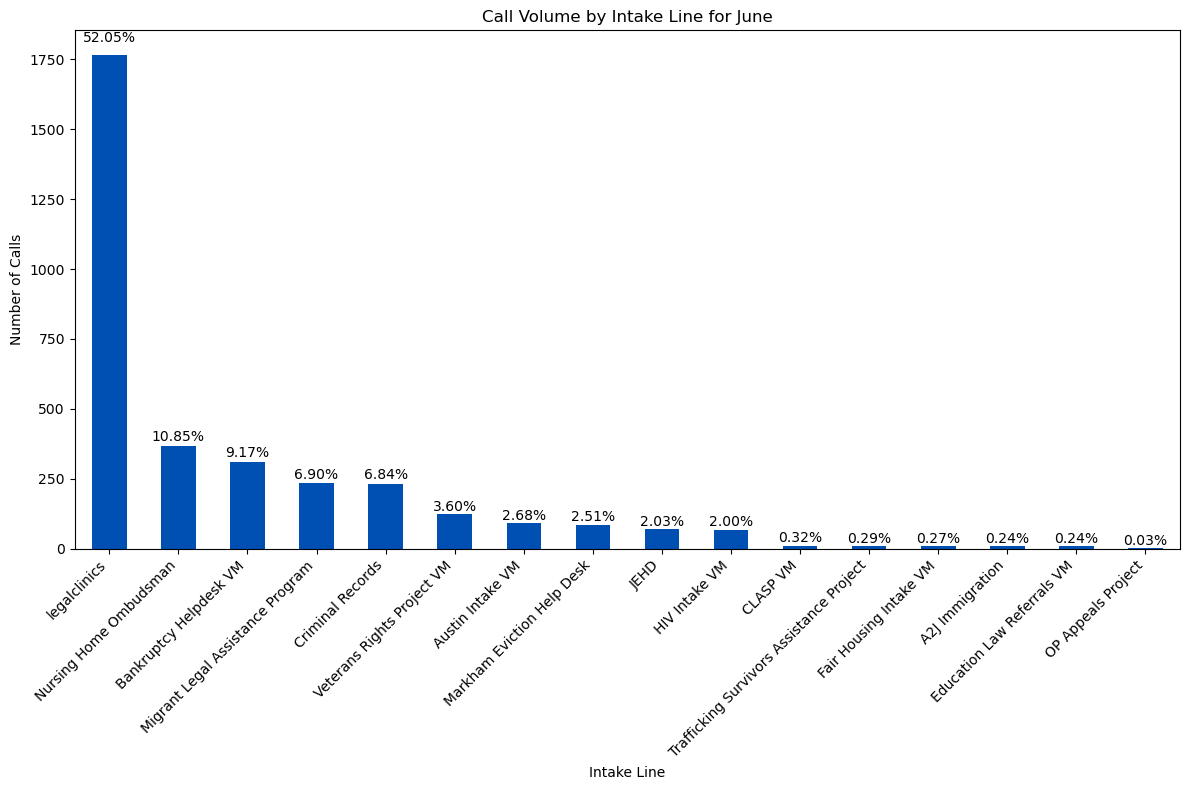

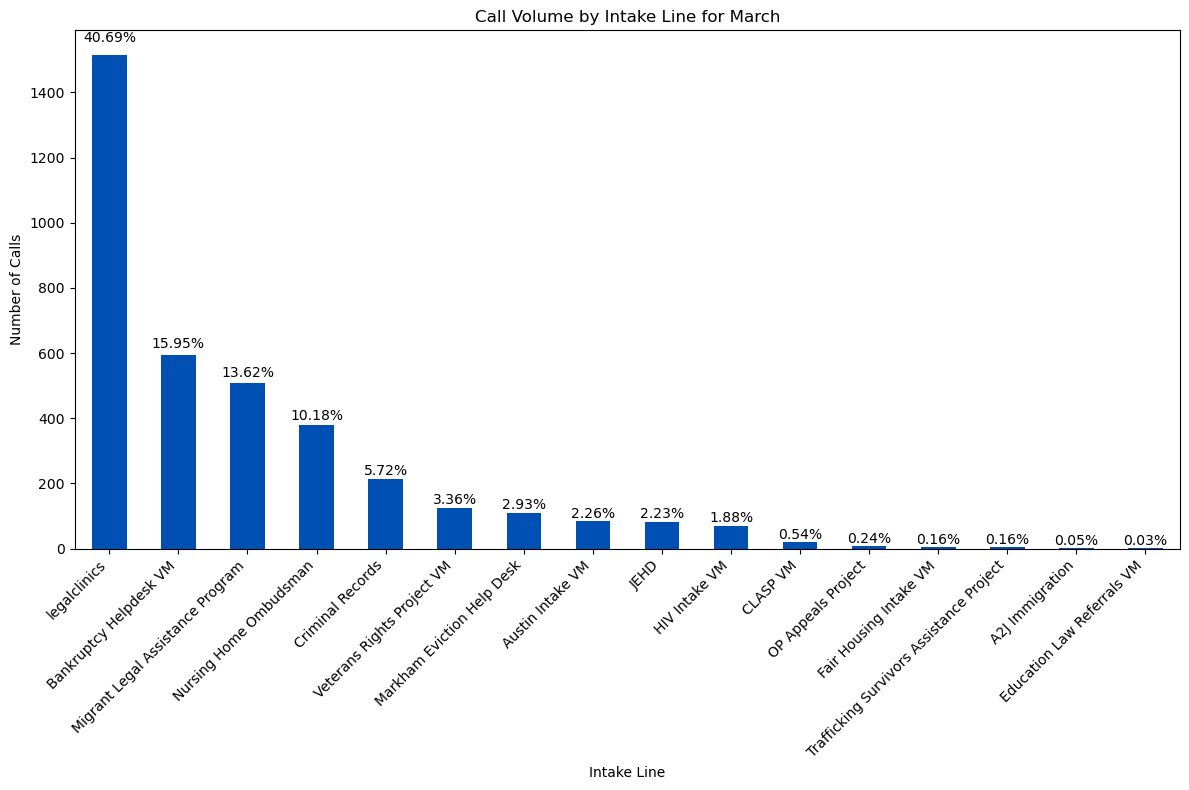

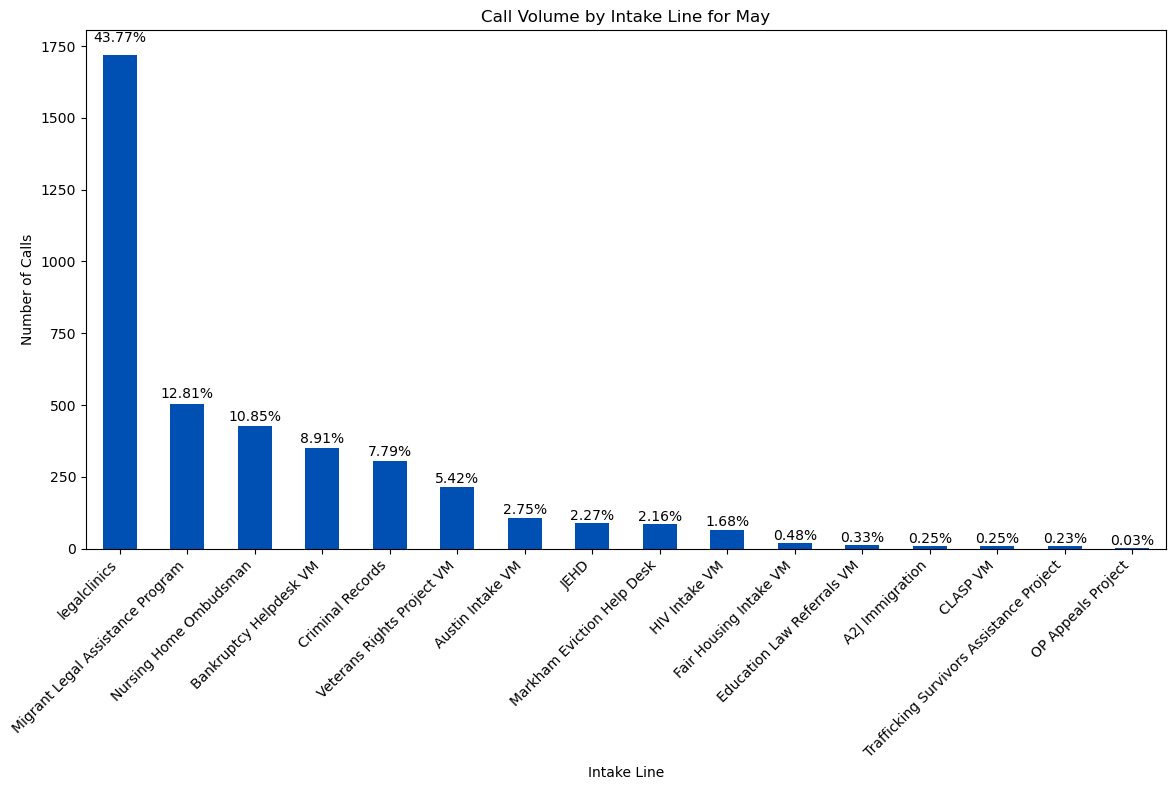

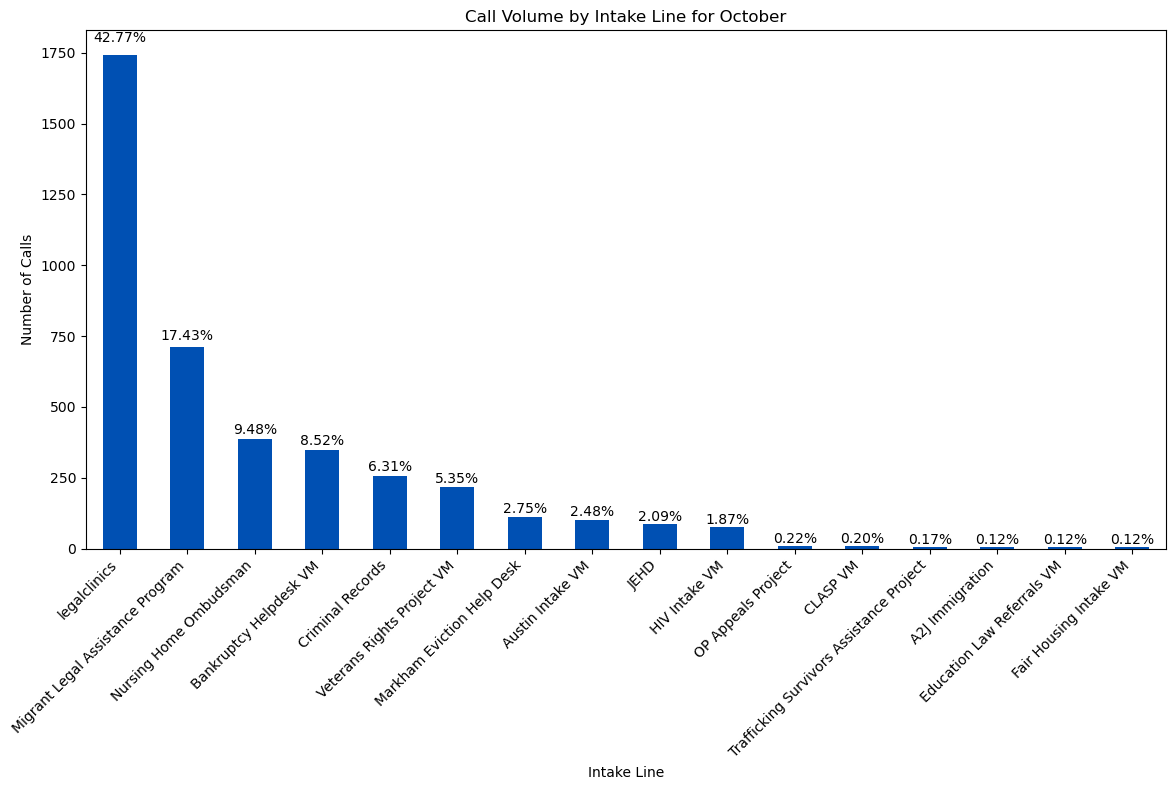

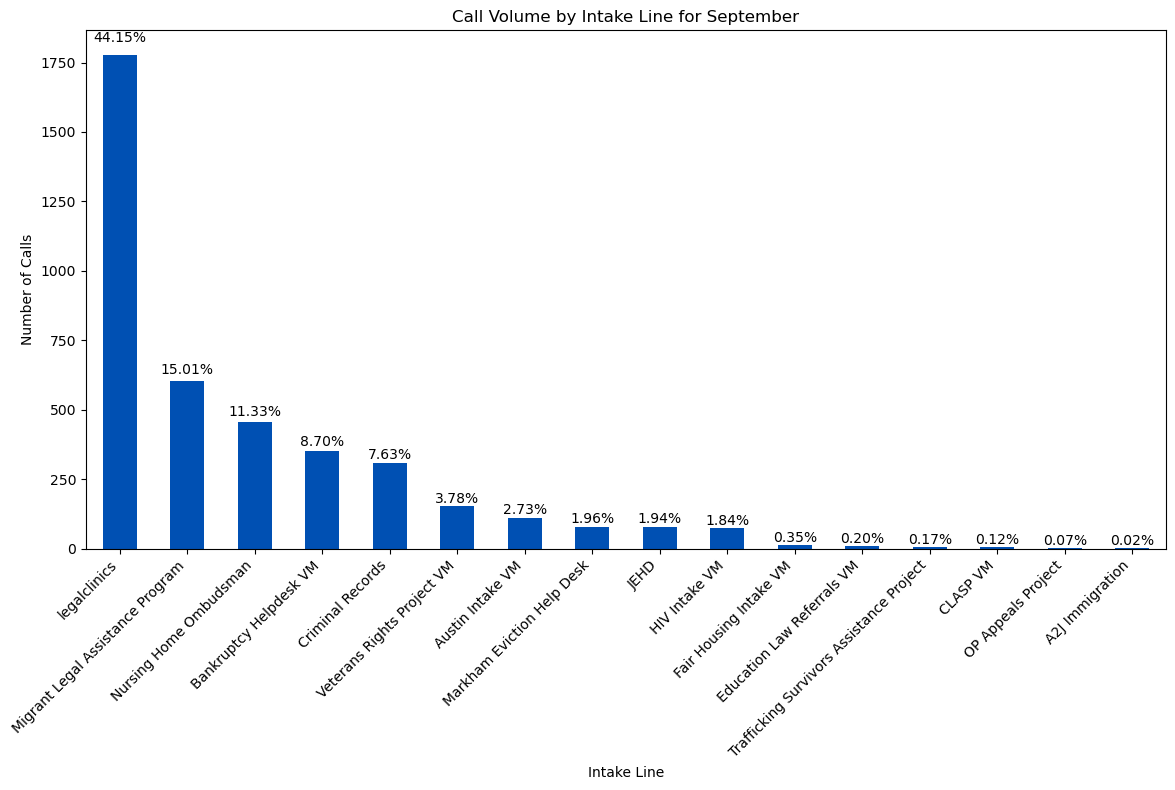

In [409]:
# Group by 'Month' and 'Intake Line Name' to calculate the call volume for each intake line per month
call_volume_by_month_line = intake_calls_inbound.groupby(['Month', 'Intake Line Name']).size().unstack(fill_value=0)

# Plotting the call volume for each intake line for each month
for month in call_volume_by_month_line.index:
    # Get the data for the current month
    monthly_data = call_volume_by_month_line.loc[month]

    # Sort the monthly data in descending order
    monthly_data = monthly_data.sort_values(ascending=False)

    # Create a bar plot for this month's data
    plt.figure(figsize=(12, 8))  
    ax = monthly_data.plot(kind='bar', color='#0050B3')

    # Calculate the total call volume for the month
    total_calls = monthly_data.sum()

    # Calculate the proportions for each intake line in this month
    proportions = monthly_data / total_calls * 100

    for i, v in enumerate(monthly_data):
        ax.text(i, v + (v * 0.02), f'{proportions[i]:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.title(f'Call Volume by Intake Line for {month}')
    plt.xlabel('Intake Line')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()  

    plt.show()


#### - Call Volume Prop for Voicemail Intake Lines vs Other Intake lInes

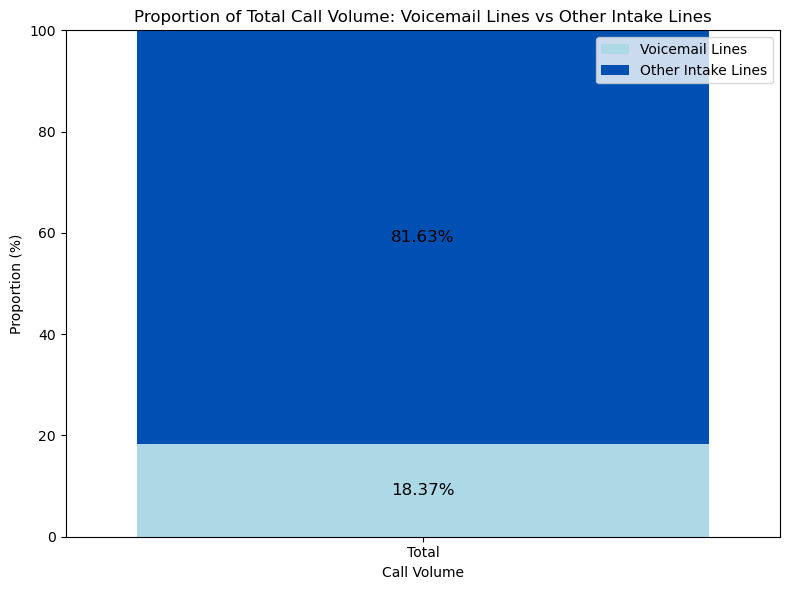

In [387]:

voicemail_lines = [line for line in intake_line_numbers if "VM" in line]

# Filter the intake_calls_inbound dataframe into two categories: voicemail lines and other intake lines
voicemail_calls = intake_calls_inbound[intake_calls_inbound['Intake Line Name'].isin(voicemail_lines)]
other_calls = intake_calls_inbound[~intake_calls_inbound['Intake Line Name'].isin(voicemail_lines)]

# Step 1: Group by 'Intake Line Name' and calculate the total call volume for voicemail lines and other intake lines
# For voicemail lines
voicemail_call_volume = voicemail_calls.groupby('Intake Line Name').size().sum()

# For other intake lines
other_call_volume = other_calls.groupby('Intake Line Name').size().sum()

# Step 2: Calculate the total call volume for all lines
total_call_volume = voicemail_call_volume + other_call_volume

# Step 3: Calculate the proportions (percentage) for voicemail lines and other intake lines
voicemail_proportion = voicemail_call_volume / total_call_volume * 100
other_proportion = other_call_volume / total_call_volume * 100

# Step 4: Create a new DataFrame with the proportions for both groups
combined_proportion = pd.DataFrame({
    'Voicemail Lines': [voicemail_proportion],
    'Other Intake Lines': [other_proportion]
})

# Step 5: Create a stacked bar chart with voicemail lines and other intake lines stacked on top of each other
fig, ax = plt.subplots(figsize=(8, 6))  

# Plot for voicemail lines
ax.bar(0, voicemail_proportion, color='lightblue', label='Voicemail Lines')

# Plot for other intake lines
ax.bar(0, other_proportion, bottom=voicemail_proportion, color='#0050B3', label='Other Intake Lines')

# text annotations for proportions
ax.text(0, voicemail_proportion / 2, f'{voicemail_proportion:.2f}%', ha='center', va='center', fontsize=12, color='black')
ax.text(0, voicemail_proportion + other_proportion / 2, f'{other_proportion:.2f}%', ha='center', va='center', fontsize=12, color='black')

ax.set_ylim(0, 100)

# Set the x-axis limits and label
ax.set_xlim(-0.5, 0.5) 
ax.set_xticks([0])  
ax.set_xticklabels(['Total'])  # Label for the x-axis

# Title and labels
plt.title('Proportion of Total Call Volume: Voicemail Lines vs Other Intake Lines')
plt.xlabel('Call Volume')
plt.ylabel('Proportion (%)')

# Add a legend
plt.legend()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


### Question 2: For numbers that have an internal transfer option, how many calls come in directly and how many come in via internal transfer (also percentages)

In [345]:
total_intake_line_calls = len(intake_calls_inbound)
total_intake_line_calls



42243

- Need Further Clarifications on CAR data for Further analysis


### Question 3: Times of day and days of week trends 

#### - Call Volume Trend per Hour of Day

/var/folders/dt/c0g1n3x53fj6tmsz1md9qz9c0000gn/T/ipykernel_1639/1153672795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intake_calls_inbound['Hour'] = intake_calls_inbound['Start time'].dt.hour


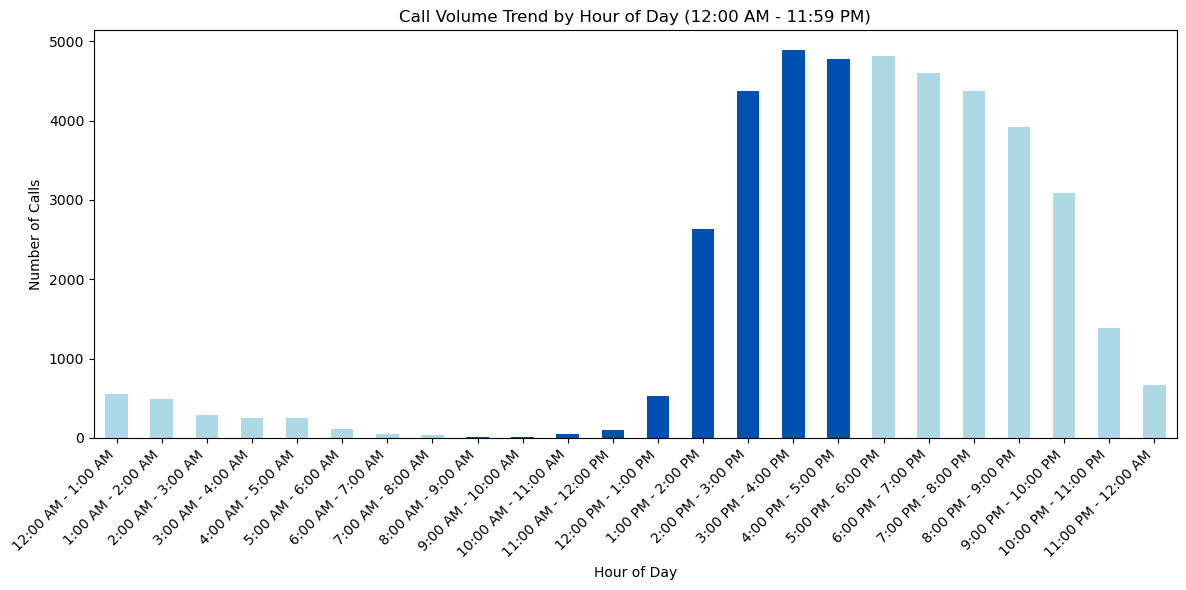

In [389]:
# Extracting hour from 'Start time' 
intake_calls_inbound['Hour'] = intake_calls_inbound['Start time'].dt.hour

# Grouping by 'Hour' and calculating the number of calls for each hourly range (e.g., 12:00 AM - 1:00 AM)
call_volume_by_hour = intake_calls_inbound.groupby('Hour').size()

colors = ['#0050B3' if 8 <= hour < 17 else 'lightblue' for hour in call_volume_by_hour.index]


# Plotting  call volume trend by hour of the day (ranges)
fig, ax = plt.subplots(figsize=(12, 6))
call_volume_by_hour.plot(kind='bar', color=colors, ax=ax)

# Hour Ranges for x-axis label
hour_labels = ['12:00 AM - 1:00 AM', '1:00 AM - 2:00 AM', '2:00 AM - 3:00 AM', '3:00 AM - 4:00 AM', 
               '4:00 AM - 5:00 AM', '5:00 AM - 6:00 AM', '6:00 AM - 7:00 AM', '7:00 AM - 8:00 AM',
               '8:00 AM - 9:00 AM', '9:00 AM - 10:00 AM', '10:00 AM - 11:00 AM', '11:00 AM - 12:00 PM',
               '12:00 PM - 1:00 PM', '1:00 PM - 2:00 PM', '2:00 PM - 3:00 PM', '3:00 PM - 4:00 PM',
               '4:00 PM - 5:00 PM', '5:00 PM - 6:00 PM', '6:00 PM - 7:00 PM', '7:00 PM - 8:00 PM',
               '8:00 PM - 9:00 PM', '9:00 PM - 10:00 PM', '10:00 PM - 11:00 PM', '11:00 PM - 12:00 AM']

# Bar positioning
ax.set_xticks(range(24))
ax.set_xticklabels(hour_labels, rotation=45, ha="right")

plt.title('Call Volume Trend by Hour of Day (12:00 AM - 11:59 PM)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')

plt.tight_layout()

plt.show()



#### - Call Volume Trend for Voicemail Lines per Hour of Day

/var/folders/dt/c0g1n3x53fj6tmsz1md9qz9c0000gn/T/ipykernel_1639/1527086116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voicemail_calls['Hour'] = voicemail_calls['Start time'].dt.hour


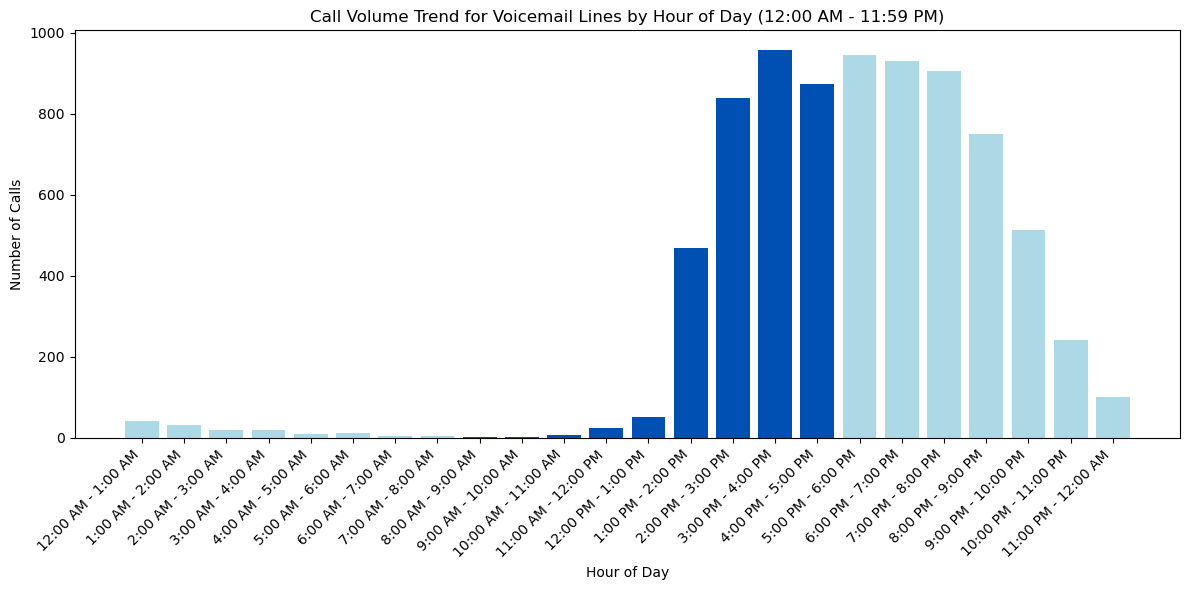

In [391]:
# Extracting hour from voicemail_calls 'Start time' column
voicemail_calls['Hour'] = voicemail_calls['Start time'].dt.hour

# Grouping by 'Hour' and calculating the number of calls on voicemail_calls
call_volume_by_hour_voicemail = voicemail_calls.groupby('Hour').size()

# Defining rough business hours (dark blue) and after-hours (light blue)
colors = ['#0050B3' if 8 <= hour < 17 else 'lightblue' for hour in call_volume_by_hour.index]

# Plotting the call volume trend for voicemail lines by hour of the day
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(call_volume_by_hour_voicemail.index, call_volume_by_hour_voicemail, color=colors)

hour_labels = ['12:00 AM - 1:00 AM', '1:00 AM - 2:00 AM', '2:00 AM - 3:00 AM', '3:00 AM - 4:00 AM', 
               '4:00 AM - 5:00 AM', '5:00 AM - 6:00 AM', '6:00 AM - 7:00 AM', '7:00 AM - 8:00 AM',
               '8:00 AM - 9:00 AM', '9:00 AM - 10:00 AM', '10:00 AM - 11:00 AM', '11:00 AM - 12:00 PM',
               '12:00 PM - 1:00 PM', '1:00 PM - 2:00 PM', '2:00 PM - 3:00 PM', '3:00 PM - 4:00 PM',
               '4:00 PM - 5:00 PM', '5:00 PM - 6:00 PM', '6:00 PM - 7:00 PM', '7:00 PM - 8:00 PM',
               '8:00 PM - 9:00 PM', '9:00 PM - 10:00 PM', '10:00 PM - 11:00 PM', '11:00 PM - 12:00 AM']

ax.set_xticks(range(24))
ax.set_xticklabels(hour_labels, rotation=45, ha="right")

plt.title('Call Volume Trend for Voicemail Lines by Hour of Day (12:00 AM - 11:59 PM)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')


plt.tight_layout()

# Show the plot
plt.show()


#### - Call Volume Trends per Day of Week

/var/folders/dt/c0g1n3x53fj6tmsz1md9qz9c0000gn/T/ipykernel_1639/2077842206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intake_calls_inbound['Day of Week'] = intake_calls_inbound['Start time'].dt.dayofweek


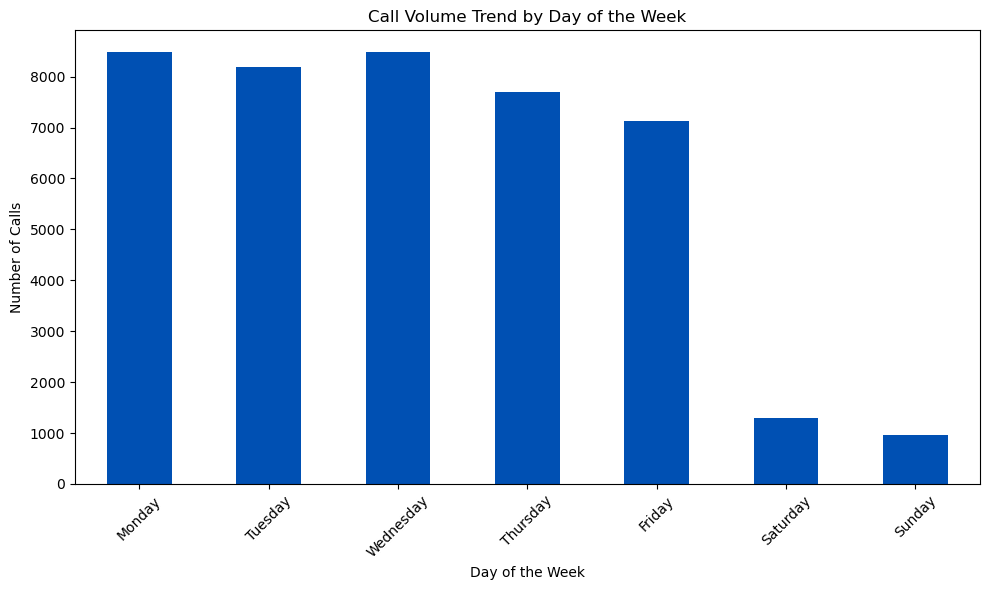

In [393]:
# Extracting  day of the week from the 'Start time' column
intake_calls_inbound['Day of Week'] = intake_calls_inbound['Start time'].dt.dayofweek

# Grouping by 'Day of Week' and calculating  number of calls for each day of the week
call_volume_by_day = intake_calls_inbound.groupby('Day of Week').size()

# Days of the week labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the call volume trend by day of the week
fig, ax = plt.subplots(figsize=(10, 6))
call_volume_by_day.plot(kind='bar', color='#0050B3', ax=ax)

ax.set_xticklabels(day_labels, rotation=45)

plt.title('Call Volume Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')

plt.tight_layout()

plt.show()


#### - Call Volume Trends for Voicemail lines per Day of Week

/var/folders/dt/c0g1n3x53fj6tmsz1md9qz9c0000gn/T/ipykernel_1639/117361485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voicemail_calls['Day of Week'] = voicemail_calls['Start time'].dt.dayofweek


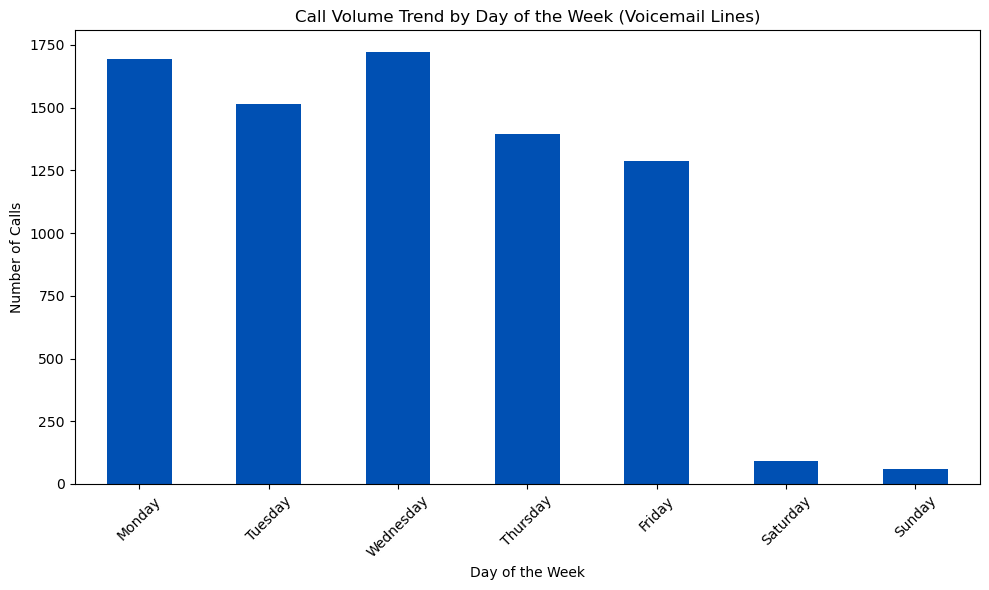

In [395]:
# Extract day of the week from voicemail_calls 'Start time' column 
voicemail_calls['Day of Week'] = voicemail_calls['Start time'].dt.dayofweek

# Grouping by 'Day of Week' and calculating the number of calls for each day of the week for voicemail lines
call_volume_by_day_voicemail = voicemail_calls.groupby('Day of Week').size()

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(10, 6))
call_volume_by_day_voicemail.plot(kind='bar', color='#0050B3', ax=ax)

ax.set_xticklabels(day_labels, rotation=45)

plt.title('Call Volume Trend by Day of the Week (Voicemail Lines)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')

plt.tight_layout()

plt.show()
